# Objective

This notebook demonstrates a method to determine reliable* centroid coordinates from raw annotation data crowdsourced from citizen scientists through Quantius. This method uses the SpotAnnotationAnalysis class. The SpotAnnotationAnalysis class provides tools to visualize annotation and clustering data and compare them with reference spots (simulated or manually annotated) throughout the process; this notebook also demonstrates these visualization tools.

*Calculation and visualization of FPR and TPR for the resulting centroids are also demonstrated in this notebook.

# I/O

- In: json file containing worker annotations from Quantius.
- Out: pandas dataframe containing reliable* cluster centroids.

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util

import math
import pandas as pd

#### Instantiate a BaseAnnotation object and a SpotAnnotationAnalysis object.

In [2]:
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/Spot_density.json'
img_filename = 'snr_5_0_density_0.008_spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/spot_images/snr_5_0_density_0.008_spot_img.png'
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/spot_data/snr_5_0_density_0.008_coord_snr_list.csv'

qa = QuantiusAnnotation(json_filepath, img_filename)
sa = SpotAnnotationAnalysis(qa)
anno_all = qa.df()

#### Cluster annotations.

In [3]:
clustering_params = ['AffinityPropagation', -350]
clusters = sa.get_clusters(anno_all, clustering_params)
util.print_head(clusters)

  centroid_x centroid_y                                            members
0        236        270  [[236, 270, 820, A16E62HXYVRQLI], [238, 268, 6...
1        214        260  [[214, 260, 1083, A16E62HXYVRQLI], [216, 260, ...
2        244        249  [[244, 249, 861, A16E62HXYVRQLI], [246, 250, 8...
3        255        245  [[255, 245, 1202, A16E62HXYVRQLI], [253, 241, ...
4        272        176  [[272, 176, 781, A16E62HXYVRQLI], [272, 174, 6...


#### Assemble a dataframe of centroids found with annotation and reference data consolidated. 

centoid_and_ref_df is this dataframe:
- centroid_x | centroid_y | x of nearest ref | y of nearest ref | NN_dist | members
    - centroid_x = x coord of cluster centroid
    - centroid_y = y coord of cluster centroid
    - NN_x = x coord of nearest neighbor reference
    - NN_y = y coord of nearest neighbor reference
    - NN_dist = distance from centroid to nearest neighbor reference
    - members = list of annotations belonging to cluster
        - each annotation is a list of click properties: x_coord | y_coord | time_spent | worker_ID

In [4]:
img_height = anno_all['height'].values[0]
centroid_and_ref_df = util.centroid_and_ref_df(clusters, csv_filepath, img_height)

### Plot Annotations

plot_annotations() provides a customizable first look at the annotations, initial clustering, and reference points for an image.

#### Show spot image only.

<Figure size 864x504 with 0 Axes>

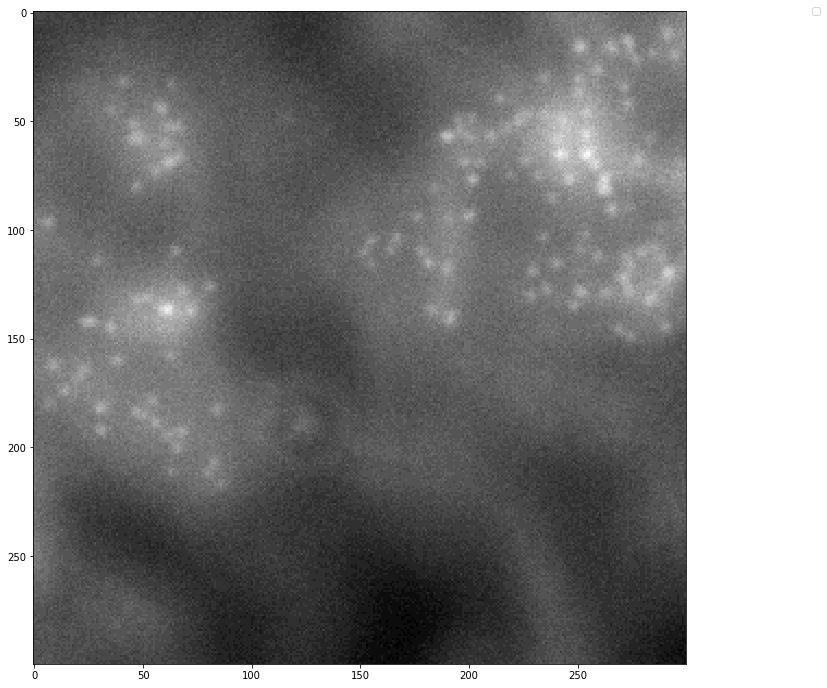

In [5]:
show_workers = False
show_correctness_workers = False
show_centroids = False
show_correctness_centroids = False
show_ref_points = False
show_NN_inc = False
correctness_threshold = 4
worker_marker_size = 8
cluster_marker_size = 40
ref_marker_size = None
bigger_window_size = True

util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Show worker annotations only.

<Figure size 864x504 with 0 Axes>

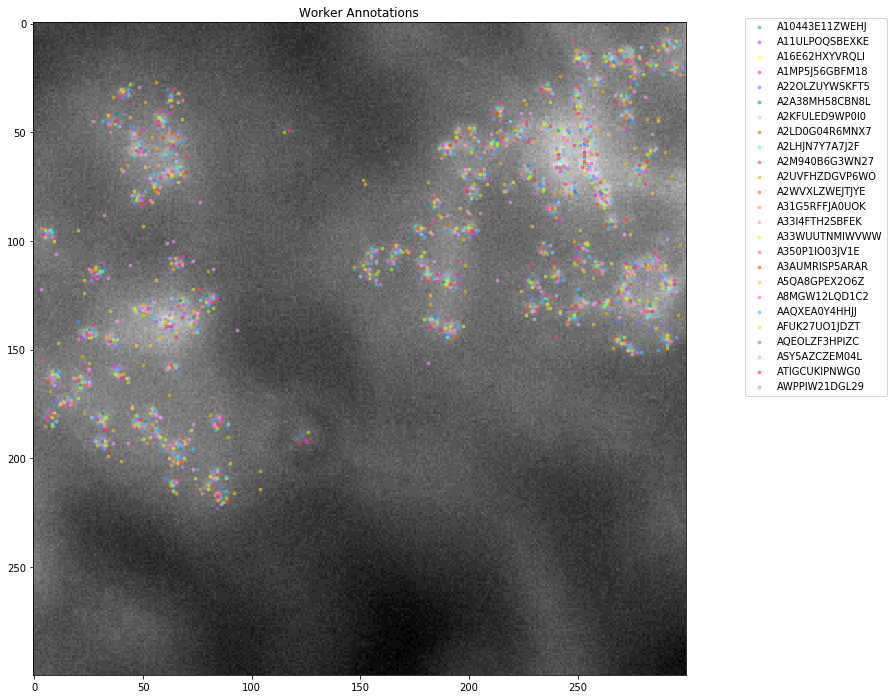

In [6]:
show_workers = True
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Show worker annotations and cluster centroids.

<Figure size 864x504 with 0 Axes>

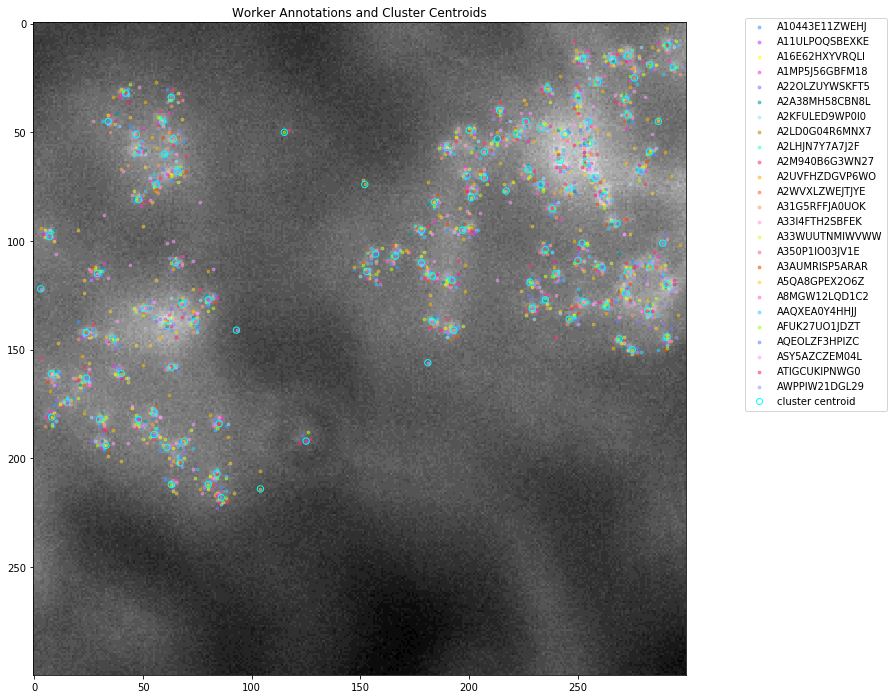

In [7]:
show_centroids = True
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Show the correctness of worker annotations only.
Pass a correctness threshold into plot_annotations() to specify the maximum distance between a reference spot and a "correct" centroid. Worker annotations belonging to "correct" centroids are shown in green.

In [ ]:
show_correctness_workers = True
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Show the correctness of centroids only.
Pass a correctness threshold into plot_annotations() to specify the maximum distance between a reference spot and a "correct" centroid. Corresponding centroid markers are shown in green.

In [ ]:
show_correctness_centroids = True
show_correctness_workers = False
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Include markers for reference spots.

In [ ]:
show_ref_points = True
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

#### Show each incorrect centroid and its closest reference spot in the same color.

In [ ]:
show_NN_inc = True
show_workers = False
util.plot_annotations(anno_all, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

### Get large clusters
#### Sort clusters by number of unique annotators. Visualize cluster size threshold.

In [ ]:
cluster_size_threshold = util.get_cluster_size_threshold(clusters)
small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
sa.plot_cluster_size_threshold(clusters, cluster_size_threshold)

#### visualize_clusters() is specifically suited for visualizing cluster dataframes at various stages of screening and declumping.

In [ ]:
show_workers = True
show_centroids = False
plot_title = 'Clusters with at least ' + str(math.ceil(cluster_size_threshold)) + ' unique annotators'
x_bounds, y_bounds, show_ref_points = None, None, False
sa.visualize_clusters(large_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

#### Show centroids only.

In [ ]:
show_workers = False
show_centroids = True
sa.visualize_clusters(large_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

### Get clumpy clusters
#### Sort clusters by fraction of unique annotators who contribute more than once and visualize the clumpiness threshold.

In [ ]:
clumpiness_threshold = sa.plot_clumpiness_threshold(large_clusters)
clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)

#### Plot clusters identified as "clumpy."

In [ ]:
show_workers = True
show_centroids = True
plot_title = 'Clumpy clusters, e.g. clusters where at least ' + str(math.floor(100*(1-clumpiness_threshold))) + '% of unique annotators contributed more than once'
sa.visualize_clusters(clumpy_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

#### Partition clumpy clusters and add the results of partitioning to the dataframe of large, nonclumpy clusters.

In [ ]:
declumping_params = ['KMeans', 2]

result_clusters = nonclumpy_clusters
for i in range(len(clumpy_clusters.index)):
    
    # actual functionality
    subclusters = sa.declump(clumpy_clusters, i, declumping_params)
    result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

    # print resulting subclusters df
    row = clumpy_clusters.iloc[[i]]
    centroid_x, centroid_y_flipped = row.iloc[0]['centroid_x'], img_height - row.iloc[0]['centroid_y']
    print('Declumping of cluster at (' + str(centroid_x) + ', ' + str(centroid_y_flipped) + ')')
    util.print_head(subclusters)
    print()
    
    # visualize declumping, zoomed-in
    plot_title = 'Clumpy cluster at (' + str(centroid_x) + ', ' + str(centroid_y_flipped) + ')'
    margin = 30
    sa.visualize_clusters(subclusters, show_workers, show_centroids, True, 20, 200, 100, csv_filepath, img_filepath, img_height, [centroid_x-margin, centroid_x+margin], [centroid_y_flipped-margin, centroid_y_flipped+margin], plot_title, False)

#### Visualize all resulting clusters (including original nonclumpy and newly declumped).

In [ ]:
plot_title = 'All large clusters. Clumpy clusters have been declumped.'
sa.visualize_clusters(result_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)

### FPR and TPR 
#### Calculate and visualize the quality of the resulting clusters.

In [ ]:
plot_tpr = True
plot_fpr = False
tpr, fpr = sa.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
plot_tpr = False
plot_fpr = True
tpr, fpr = sa.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
print('TPR: ' + str(round(tpr, 2)))
print('FPR: ' + str(round(fpr, 2)))